In [1]:
import hail as hl
from tqdm import tqdm
import math
import time
import datetime

Loading BokehJS ...

In [2]:
print(hl.citation())

Hail Team. Hail 0.2.130-bea04d9c79b5. https://github.com/hail-is/hail/releases/tag/0.2.130.


In [3]:
config = {
    'spark.driver.memory' : '400g'
}
hl.init(
    spark_conf = config,
    default_reference = 'GRCh38'
    )

/home/bpark/miniconda3/envs/hail/lib/python3.9/site-packages/hail/context.py:352: UserWarning:

Using hl.init with a default_reference argument is deprecated. To set a default reference genome after initializing hail, call `hl.default_reference` with an argument to set the default reference genome.



24/05/09 15:14:10 WARN Utils: Your hostname, localhost.localdomain resolves to a loopback address: 127.0.0.1; using 192.168.0.130 instead (on interface ens15f0)
24/05/09 15:14:10 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
24/05/09 15:14:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Running on Apache Spark version 3.3.4
SparkUI available at http://192.168.0.130:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.130-bea04d9c79b5
LOGGING: writing to /home/bpark/projects/hail-20240509-1514-0.2.130-bea04d9c79b5.log


In [18]:
import os
import pandas as pd

path = './1kg_/'
fileEx = r'.gvcf.bgz'
gvcfs = [path + vcf for vcf in os.listdir(path) if vcf.endswith(fileEx)]

In [19]:
len(gvcfs)

100

In [20]:
gvcfs[0]

'./1kg_/HG03480.hard-filtered.gvcf.bgz'

In [40]:
gvcfs

['./1kg_/HG03480.hard-filtered.gvcf.bgz',
 './1kg_/NA18489.hard-filtered.gvcf.bgz',
 './1kg_/HG01884.hard-filtered.gvcf.bgz',
 './1kg_/NA19031.hard-filtered.gvcf.bgz',
 './1kg_/NA19835.hard-filtered.gvcf.bgz',
 './1kg_/HG03279.hard-filtered.gvcf.bgz',
 './1kg_/NA19099.hard-filtered.gvcf.bgz',
 './1kg_/NA18505.hard-filtered.gvcf.bgz',
 './1kg_/HG03428.hard-filtered.gvcf.bgz',
 './1kg_/NA19037.hard-filtered.gvcf.bgz',
 './1kg_/NA19017.hard-filtered.gvcf.bgz',
 './1kg_/HG03578.hard-filtered.gvcf.bgz',
 './1kg_/NA18511.hard-filtered.gvcf.bgz',
 './1kg_/HG03073.hard-filtered.gvcf.bgz',
 './1kg_/HG03054.hard-filtered.gvcf.bgz',
 './1kg_/HG03453.hard-filtered.gvcf.bgz',
 './1kg_/HG02511.hard-filtered.gvcf.bgz',
 './1kg_/HG02952.hard-filtered.gvcf.bgz',
 './1kg_/HG03470.hard-filtered.gvcf.bgz',
 './1kg_/HG03479.hard-filtered.gvcf.bgz',
 './1kg_/HG03082.hard-filtered.gvcf.bgz',
 './1kg_/HG02978.hard-filtered.gvcf.bgz',
 './1kg_/HG02757.hard-filtered.gvcf.bgz',
 './1kg_/HG03369.hard-filtered.gvc

In [23]:
fs = []
for i in range(100):
    file_size = os.path.getsize(gvcfs[i])
    fs.append(file_size)
    

In [26]:
x

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [30]:
def convert_size(size_bytes):
    import math
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])

In [31]:
for r in x:
    print(convert_size(sum(fs[0:r])))

30.19 GB
66.35 GB
95.45 GB
126.06 GB
157.51 GB
186.64 GB
222.36 GB
259.78 GB
291.31 GB
327.8 GB


In [37]:
size = []
for r in x:
    size.append(convert_size(sum(fs[0:r])).split('.')[0])

In [38]:
df = pd.DataFrame({"samples":x, "size":size})

(<Axes: xlabel='samples', ylabel='size'>,)

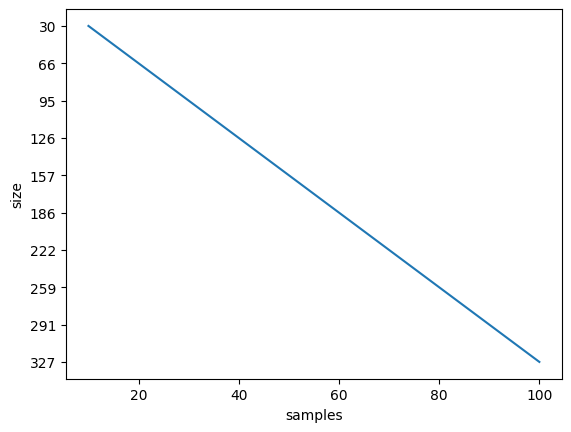

In [39]:
sns.lineplot(data=df, x="samples", y="size"), 

In [7]:
run_time = []

for i in tqdm(range(10)):
    start = time.time()
    
    e = (i+1)*10    
    combiner = hl.vds.new_combiner(
        output_path ='vds/test{}.vds'.format(i),
        temp_path='tmp/',
        gvcf_paths= gvcfs[0:e],
        use_genome_default_intervals = True
    )
    
    combiner.run()
    
    end = time.time()
    
    sec = (end - start)
    run_time.append(sec)
    result = datetime.timedelta(seconds=sec)
    print(sec, result)
    
    

  0%|          | 0/10 [00:00<?, ?it/s]

2024-05-09 15:14:38.388 Hail: WARN: expected input file 'file:/home/bpark/projects/1kg_/HG03480.hard-filtered.gvcf.bgz' to end in .vcf[.bgz, .gz]
2024-05-09 15:14:38.732 Hail: WARN: expected input file 'file:/home/bpark/projects/1kg_/HG03480.hard-filtered.gvcf.bgz' to end in .vcf[.bgz, .gz]
2024-05-09 15:14:39.733 Hail: INFO: scanning VCF for sortedness...
2024-05-09 15:16:26.142 Hail: INFO: Coerced sorted VCF - no additional import work to do
2024-05-09 15:16:28.119 Hail: WARN: generated combiner save path of tmp/combiner-plans/vds-combiner-plan_f4907a283a903bcd92d0e75c720b530b0f56536fccf9fc870eee0c477bd7aedf_0.2.130.json
2024-05-09 15:16:28.122 Hail: INFO: Running VDS combiner:
    VDS arguments: 0 datasets with 0 samples
    GVCF arguments: 10 inputs/samples
    Branch factor: 100
    GVCF merge batch size: 50
2024-05-09 15:16:28.219 Hail: INFO: GVCF combine (job 1): merging 10 GVCFs into 1 datasets
2024-05-09 15:21:59.799 Hail: INFO: wrote matrix table with 838300184 rows and 10 co

 10%|█         | 1/10 [11:47<1:46:05, 707.31s/it]===========>(2539 + 32) / 2586]

707.310346364975 0:11:47.310346


 20%|██        | 2/10 [33:22<2:20:27, 1053.38s/it]=========> (2509 + 34) / 2586]

1295.6314814090729 0:21:35.631481


 30%|███       | 3/10 [1:04:30<2:46:15, 1425.08s/it]=======> (2535 + 38) / 2586]

1867.4010529518127 0:31:07.401053


 40%|████      | 4/10 [1:45:42<3:03:51, 1838.61s/it]========>(2569 + 17) / 2586]

2472.555118560791 0:41:12.555119


 50%|█████     | 5/10 [2:37:26<3:11:14, 2294.84s/it]========>(2575 + 11) / 2586]

3103.7694895267487 0:51:43.769490


 60%|██████    | 6/10 [3:39:36<3:05:30, 2782.68s/it]=========>(2584 + 2) / 2586]

3729.6545066833496 1:02:09.654507


 70%|███████   | 7/10 [4:53:45<2:46:22, 3327.62s/it]=========>(2581 + 5) / 2586]

4449.565585851669 1:14:09.565586


 80%|████████  | 8/10 [6:21:51<2:11:41, 3950.85s/it]=========>(2584 + 2) / 2586]

5285.282224416733 1:28:05.282224


 90%|█████████ | 9/10 [8:00:49<1:16:12, 4572.18s/it]=========>(2585 + 1) / 2586]

5938.377403259277 1:38:58.377403


100%|██████████| 10/10 [9:53:12<00:00, 3559.24s/it] =========>(2584 + 2) / 2586]

6742.795735836029 1:52:22.795736


In [6]:
run_time = [707.310346364975,
 1295.6314814090729,
 1867.4010529518127,
 2472.555118560791,
 3103.7694895267487,
 3729.6545066833496,
 4449.565585851669,
 5285.282224416733,
 5938.377403259277,
 6742.795735836029]

In [8]:
x = []
for i in range(10):
    e = (i+1)*10
    x.append(e)  

In [11]:
x

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [12]:
run_time

[707.310346364975,
 1295.6314814090729,
 1867.4010529518127,
 2472.555118560791,
 3103.7694895267487,
 3729.6545066833496,
 4449.565585851669,
 5285.282224416733,
 5938.377403259277,
 6742.795735836029]

(<Axes: xlabel='samples', ylabel='second'>,)

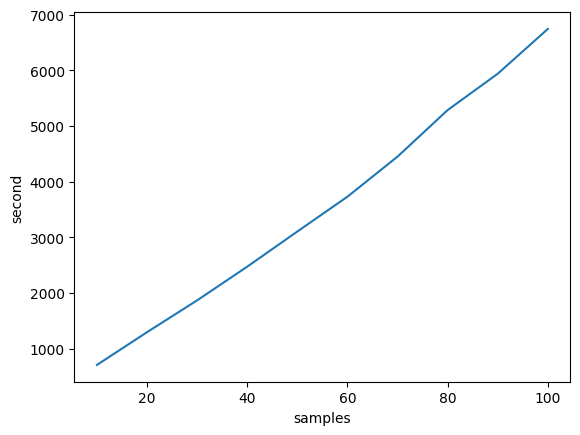

In [17]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({ "samples": x, "second": run_time})

sns.lineplot(data=df, x="samples", y="second"), 

In [9]:
for sec in run_time:
    print(datetime.timedelta(seconds=sec))

0:11:47.310346
0:21:35.631481
0:31:07.401053
0:41:12.555119
0:51:43.769490
1:02:09.654507
1:14:09.565586
1:28:05.282224
1:38:58.377403
1:52:22.795736


In [1]:
run_time

NameError: name 'run_time' is not defined

In [5]:
import os

path = './vds/'

for i in range(10):
    #print(i)
    dir = path + 'test{}.vds'.format(i)
    !du -sh $dir
    
#gvcfs = [path + vcf for vcf in os.listdir(path) if vcf.endswith(fileEx)]

22G	./vds/test0.vds
44G	./vds/test1.vds
60G	./vds/test2.vds
76G	./vds/test3.vds
92G	./vds/test4.vds
107G	./vds/test5.vds
125G	./vds/test6.vds
143G	./vds/test7.vds
159G	./vds/test8.vds
176G	./vds/test9.vds


In [6]:
combiner = hl.vds.new_combiner(
    output_path ='vds/test.vds',
    temp_path='tmp/',
    #save_path='tmp',
    gvcf_paths= gvcfs,
    use_genome_default_intervals = True
)

2024-05-08 06:40:20.044 Hail: WARN: expected input file 'file:/home/bpark/projects/1kg/HG03073.hard-filtered.gvcf.bgz' to end in .vcf[.bgz, .gz]
2024-05-08 06:40:20.601 Hail: WARN: expected input file 'file:/home/bpark/projects/1kg/HG03073.hard-filtered.gvcf.bgz' to end in .vcf[.bgz, .gz]
2024-05-08 06:40:21.660 Hail: INFO: scanning VCF for sortedness...
2024-05-08 06:41:22.967 Hail: INFO: Coerced sorted VCF - no additional import work to do
2024-05-08 06:41:24.770 Hail: WARN: generated combiner save path of tmp/combiner-plans/vds-combiner-plan_15c241ef5c53c46b3b4f46bcce32e6cd5ff316b264bce32d2c7ab147e78a9158_0.2.130.json
2024-05-08 06:42:07.302 Hail: INFO: Running VDS combiner:
    VDS arguments: 0 datasets with 0 samples
    GVCF arguments: 100 inputs/samples
    Branch factor: 100
    GVCF merge batch size: 50
2024-05-08 06:42:07.391 Hail: INFO: GVCF combine (job 1): merging 100 GVCFs into 1 datasets
2024-05-08 07:45:34.987 Hail: INFO: wrote matrix table with 2634328055 rows and 100 

In [7]:
%%time
combiner.run()

CPU times: user 5.78 s, sys: 2.39 s, total: 8.16 s
Wall time: 1h 53min 34s


In [18]:
%%time
vds = hl.vds.read_vds('vds/test.vds')

CPU times: user 22 ms, sys: 0 ns, total: 22 ms
Wall time: 184 ms


In [19]:
%%time
dense_mt = hl.vds.to_dense_mt(vds)
dense_mt.write('mt/dense.mt')

CPU times: user 1.96 s, sys: 867 ms, total: 2.82 s
Wall time: 20min 28s


In [20]:
%%time
hl.export_vcf(dense_mt, 'vcf/dense.vcf.bgz')

FatalError: HailException: VCF does not support the type(s) for the following FORMAT field(s):
	'gvcf_info': 'struct{DB: bool, FS: float64, FractionInformativeReads: float64, LOD: float64, MQ: float64, MQRankSum: float64, QD: float64, R2_5P_bias: float64, ReadPosRankSum: float64, SOR: float64}'.

Java stack trace:
is.hail.utils.HailException: VCF does not support the type(s) for the following FORMAT field(s):
	'gvcf_info': 'struct{DB: bool, FS: float64, FractionInformativeReads: float64, LOD: float64, MQ: float64, MQRankSum: float64, QD: float64, R2_5P_bias: float64, ReadPosRankSum: float64, SOR: float64}'.
	at is.hail.utils.ErrorHandling.fatal(ErrorHandling.scala:19)
	at is.hail.utils.ErrorHandling.fatal$(ErrorHandling.scala:19)
	at is.hail.utils.package$.fatal(package.scala:89)
	at is.hail.io.vcf.ExportVCF$.checkFormatSignature(ExportVCF.scala:128)
	at is.hail.expr.ir.MatrixVCFWriter.lower(MatrixWriter.scala:768)
	at is.hail.expr.ir.WrappedMatrixWriter.lower(MatrixWriter.scala:68)
	at is.hail.expr.ir.lowering.LowerTableIR$.apply(LowerTableIR.scala:1021)
	at is.hail.expr.ir.lowering.LowerToCDA$.lower(LowerToCDA.scala:27)
	at is.hail.expr.ir.lowering.LowerToCDA$.apply(LowerToCDA.scala:11)
	at is.hail.expr.ir.lowering.LowerToDistributedArrayPass.transform(LoweringPass.scala:91)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.evaluate$1(LowerOrInterpretNonCompilable.scala:27)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.rewrite$1(LowerOrInterpretNonCompilable.scala:59)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.apply(LowerOrInterpretNonCompilable.scala:64)
	at is.hail.expr.ir.lowering.LowerOrInterpretNonCompilablePass$.transform(LoweringPass.scala:83)
	at is.hail.expr.ir.lowering.LoweringPass.$anonfun$apply$3(LoweringPass.scala:32)
	at is.hail.utils.ExecutionTimer.time(ExecutionTimer.scala:84)
	at is.hail.expr.ir.lowering.LoweringPass.$anonfun$apply$1(LoweringPass.scala:32)
	at is.hail.utils.ExecutionTimer.time(ExecutionTimer.scala:84)
	at is.hail.expr.ir.lowering.LoweringPass.apply(LoweringPass.scala:30)
	at is.hail.expr.ir.lowering.LoweringPass.apply$(LoweringPass.scala:29)
	at is.hail.expr.ir.lowering.LowerOrInterpretNonCompilablePass$.apply(LoweringPass.scala:78)
	at is.hail.expr.ir.lowering.LoweringPipeline.$anonfun$apply$1(LoweringPipeline.scala:21)
	at is.hail.expr.ir.lowering.LoweringPipeline.$anonfun$apply$1$adapted(LoweringPipeline.scala:19)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at is.hail.expr.ir.lowering.LoweringPipeline.apply(LoweringPipeline.scala:19)
	at is.hail.expr.ir.CompileAndEvaluate$._apply(CompileAndEvaluate.scala:45)
	at is.hail.backend.spark.SparkBackend._execute(SparkBackend.scala:600)
	at is.hail.backend.spark.SparkBackend.$anonfun$execute$4(SparkBackend.scala:636)
	at is.hail.utils.ExecutionTimer.time(ExecutionTimer.scala:84)
	at is.hail.backend.spark.SparkBackend.$anonfun$execute$3(SparkBackend.scala:631)
	at is.hail.backend.spark.SparkBackend.$anonfun$execute$3$adapted(SparkBackend.scala:630)
	at is.hail.backend.ExecuteContext$.$anonfun$scoped$3(ExecuteContext.scala:78)
	at is.hail.utils.package$.using(package.scala:664)
	at is.hail.backend.ExecuteContext$.$anonfun$scoped$2(ExecuteContext.scala:78)
	at is.hail.utils.package$.using(package.scala:664)
	at is.hail.annotations.RegionPool$.scoped(RegionPool.scala:13)
	at is.hail.backend.ExecuteContext$.scoped(ExecuteContext.scala:65)
	at is.hail.backend.spark.SparkBackend.$anonfun$withExecuteContext$2(SparkBackend.scala:407)
	at is.hail.utils.ExecutionTimer$.time(ExecutionTimer.scala:55)
	at is.hail.utils.ExecutionTimer$.logTime(ExecutionTimer.scala:62)
	at is.hail.backend.spark.SparkBackend.withExecuteContext(SparkBackend.scala:393)
	at is.hail.backend.spark.SparkBackend.execute(SparkBackend.scala:630)
	at is.hail.backend.BackendHttpHandler.handle(BackendServer.scala:88)
	at com.sun.net.httpserver.Filter$Chain.doFilter(Filter.java:79)
	at sun.net.httpserver.AuthFilter.doFilter(AuthFilter.java:83)
	at com.sun.net.httpserver.Filter$Chain.doFilter(Filter.java:82)
	at sun.net.httpserver.ServerImpl$Exchange$LinkHandler.handle(ServerImpl.java:822)
	at com.sun.net.httpserver.Filter$Chain.doFilter(Filter.java:79)
	at sun.net.httpserver.ServerImpl$Exchange.run(ServerImpl.java:794)
	at sun.net.httpserver.ServerImpl$DefaultExecutor.execute(ServerImpl.java:199)
	at sun.net.httpserver.ServerImpl$Dispatcher.handle(ServerImpl.java:544)
	at sun.net.httpserver.ServerImpl$Dispatcher.run(ServerImpl.java:509)
	at java.lang.Thread.run(Thread.java:750)



Hail version: 0.2.130-bea04d9c79b5
Error summary: HailException: VCF does not support the type(s) for the following FORMAT field(s):
	'gvcf_info': 'struct{DB: bool, FS: float64, FractionInformativeReads: float64, LOD: float64, MQ: float64, MQRankSum: float64, QD: float64, R2_5P_bias: float64, ReadPosRankSum: float64, SOR: float64}'.

In [25]:
%%time
sparse_mt = hl.vds.to_merged_sparse_mt(vds, ref_allele_function=lambda locus: hl.missing('str'))
sparse_mt.write('mt/sparse.mt')

CPU times: user 1.14 s, sys: 464 ms, total: 1.6 s
Wall time: 12min 43s


In [22]:
%%time
hl.export_vcf(sparse_mt, 'vcf/sparse.vcf.bgz')

NameError: name 'sparse_mt' is not defined

In [44]:
hl.stop()

In [ ]:
!rename 's/.gz/.bgz/' *.gvcf.gz